In [1]:
!pip install pandas numpy scipy kaleido==0.2.1 matplotlib pyarrow pooch seaborn plotly xarray ipywidgets cfgrib cartopy scikit-learn tensorflow openpyxl

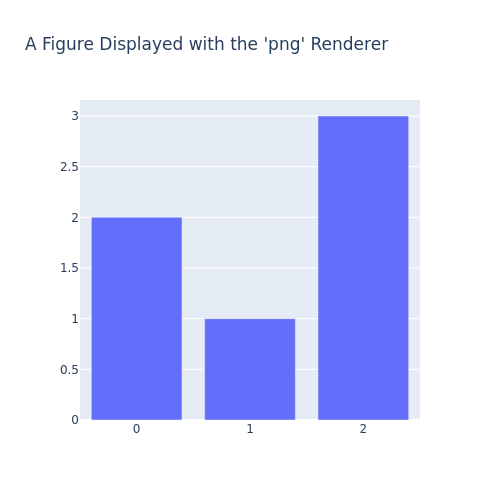

In [2]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500

pio.renderers.default = "png"

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'png' Renderer"
)
fig.show()

In [3]:
import plotly.express as px
import xarray as xr
from IPython.display import Image
from matplotlib import pyplot as plt
import random
import numpy as np

In [4]:
import pandas as pd
# uncomment to add 2024 year to 2007-2025 
hourly_df = pd.read_parquet('./caiso_oasis_14_25.parquet')
#df2025 = pd.read_csv("2025_nsphourly.csv", parse_dates=["datetime"])
#hourly_df = pd.concat([hourly_df4, df2025], ignore_index=True, sort=True)
#hourly_df.index = pd.to_datetime(hourly_df['datetime'])
#hourly_df = hourly_df.sort_index()

In [5]:
# there was a ' ' missing datapoint 
# (not null, but with a space that caused the dtype of the column to be object), fixed manually by deleting it.
#df2025['load_MW'] = df2025['load_MW'].astype(float)

In [6]:
hourly_df

,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
Date,,,,,,,,,,,,
2014-05-01 00:00:00,23355.66,0.0,280.94,23074.72,1848.36,2287.27,1399.07,7413.20,15940.38,10405.68,2.08,2881
2014-05-01 01:00:00,22257.04,0.0,360.14,21896.91,1919.63,2287.41,1115.12,7399.60,14857.99,9535.83,-0.54,2882
2014-05-01 02:00:00,21871.18,0.0,480.43,21390.75,2010.66,2286.25,1269.65,7468.35,14402.61,8836.05,0.22,2883
2014-05-01 03:00:00,21789.77,0.0,598.26,21191.51,2135.10,2286.51,1381.97,7436.30,14353.19,8549.61,0.28,2884
2014-05-01 04:00:00,22113.85,0.0,469.55,21644.30,2007.56,2287.40,1130.59,7536.23,14576.94,9151.39,0.68,2885
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-30 19:00:00,25987.12,0.0,1604.70,24382.42,2912.78,2254.51,2728.49,5662.16,20324.96,12429.17,0.00,8012
2025-11-30 20:00:00,25348.24,0.0,1267.36,24080.88,2581.54,2258.58,2671.89,5698.75,19649.44,12137.43,0.05,8013
2025-11-30 21:00:00,24809.21,0.0,1418.44,23390.77,2725.73,2260.43,2529.44,6024.43,18784.76,11269.16,0.03,8014


In [7]:
#hourly_df.to_parquet('./oasis_07_25.parquet', compression=None)

In [8]:
#hourly_df2 = pd.read_parquet('./oasis_07_25.parquet')
#hourly_df2

In [10]:
oasis2 = hourly_df[['Load']]

In [11]:
import seaborn as sns

In [15]:
df = oasis2.copy()
df['hour'] = df.index.hour
df['month'] = df.index.month
df['year'] = df.index.year
df['day'] = df.index.day
df['date'] = df.index.date
df['weekdayName'] = df.index.day_name() # df.date.dt.weekday_name on older Pandas
df['weekday'] = df.index.weekday
#df['week'] = df.datetime.dt.week
df['weekend'] = df.index.weekday // 5 == 1

In [16]:
import calendar
hour_abbr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
all_month_year_df = pd.pivot_table(df, values="Load",index=["hour"],
                                   columns=["month"],
                                   fill_value=0,
                                   margins=True)
named_index = [[hour_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]]
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

month,1,2,3,4,5,6,7,8,9,10,11,12,All
0,21555.101965,21363.626913,21284.123226,21296.419394,22410.874462,24796.184000,27251.512070,27306.251048,25479.247917,22579.051425,21327.405889,22148.587889,23308.485952
1,20916.174194,20719.709003,20610.270469,20554.808424,21515.324651,23573.999861,25808.631102,25896.425457,24307.438528,21701.564946,20662.005722,21424.419355,22372.345170
2,20522.544487,20340.839518,20196.317273,20070.874879,20913.655215,22717.576056,24802.955000,24919.147446,23482.489472,21131.153871,20239.497750,20991.875073,21754.590249
3,20397.752610,20224.003601,20029.767625,19854.686697,20632.360780,22257.748083,24227.077554,24365.931102,23023.969139,20845.014167,20079.944417,20836.052405,21448.244539
4,20734.367918,20581.990289,20305.173050,20071.359939,20789.964785,22303.275833,24132.207823,24304.771317,23043.563139,20983.836532,20358.710556,21126.311114,21605.744679
5,21838.432141,21732.641929,21333.632639,20975.560515,21535.419032,22867.040583,24638.732742,24939.336828,23775.236917,21825.233710,21379.613028,22154.136774,22452.293627
6,23698.965220,23521.287428,23018.531789,22273.063697,22474.251882,23738.112389,25381.301828,25992.838548,25182.461917,23491.120376,22874.850556,23865.170000,23816.297852
7,24799.169062,24346.220804,23929.371818,23067.998273,23530.015000,25137.934778,26897.461398,27329.525833,26234.437056,24514.839866,23764.615750,24885.089120,24900.945822
8,24919.349472,24203.720129,23901.148387,23273.951848,23999.556613,26139.511861,28256.017339,28871.911640,27521.407028,25238.558199,24150.137056,25186.238534,25525.568670
9,24563.463636,23691.244437,23463.378768,23015.642212,24073.302796,26593.789917,29038.529113,29761.218226,28335.866056,25703.171640,24103.553806,25025.492199,25689.105640


In [19]:
def plot_heatmap_year3(year):
    #plt.figure(figsize = (30, 6))
    allByYear_df = df.loc[df['year'] == year]
    allByYear_df = pd.pivot_table(allByYear_df, values="Load",
                                  index=["hour"], columns=["date"], fill_value=None)
    allByYear_df = allByYear_df.set_index([[hour_abbr[i] for i in list(allByYear_df.index)]])

    return allByYear_df

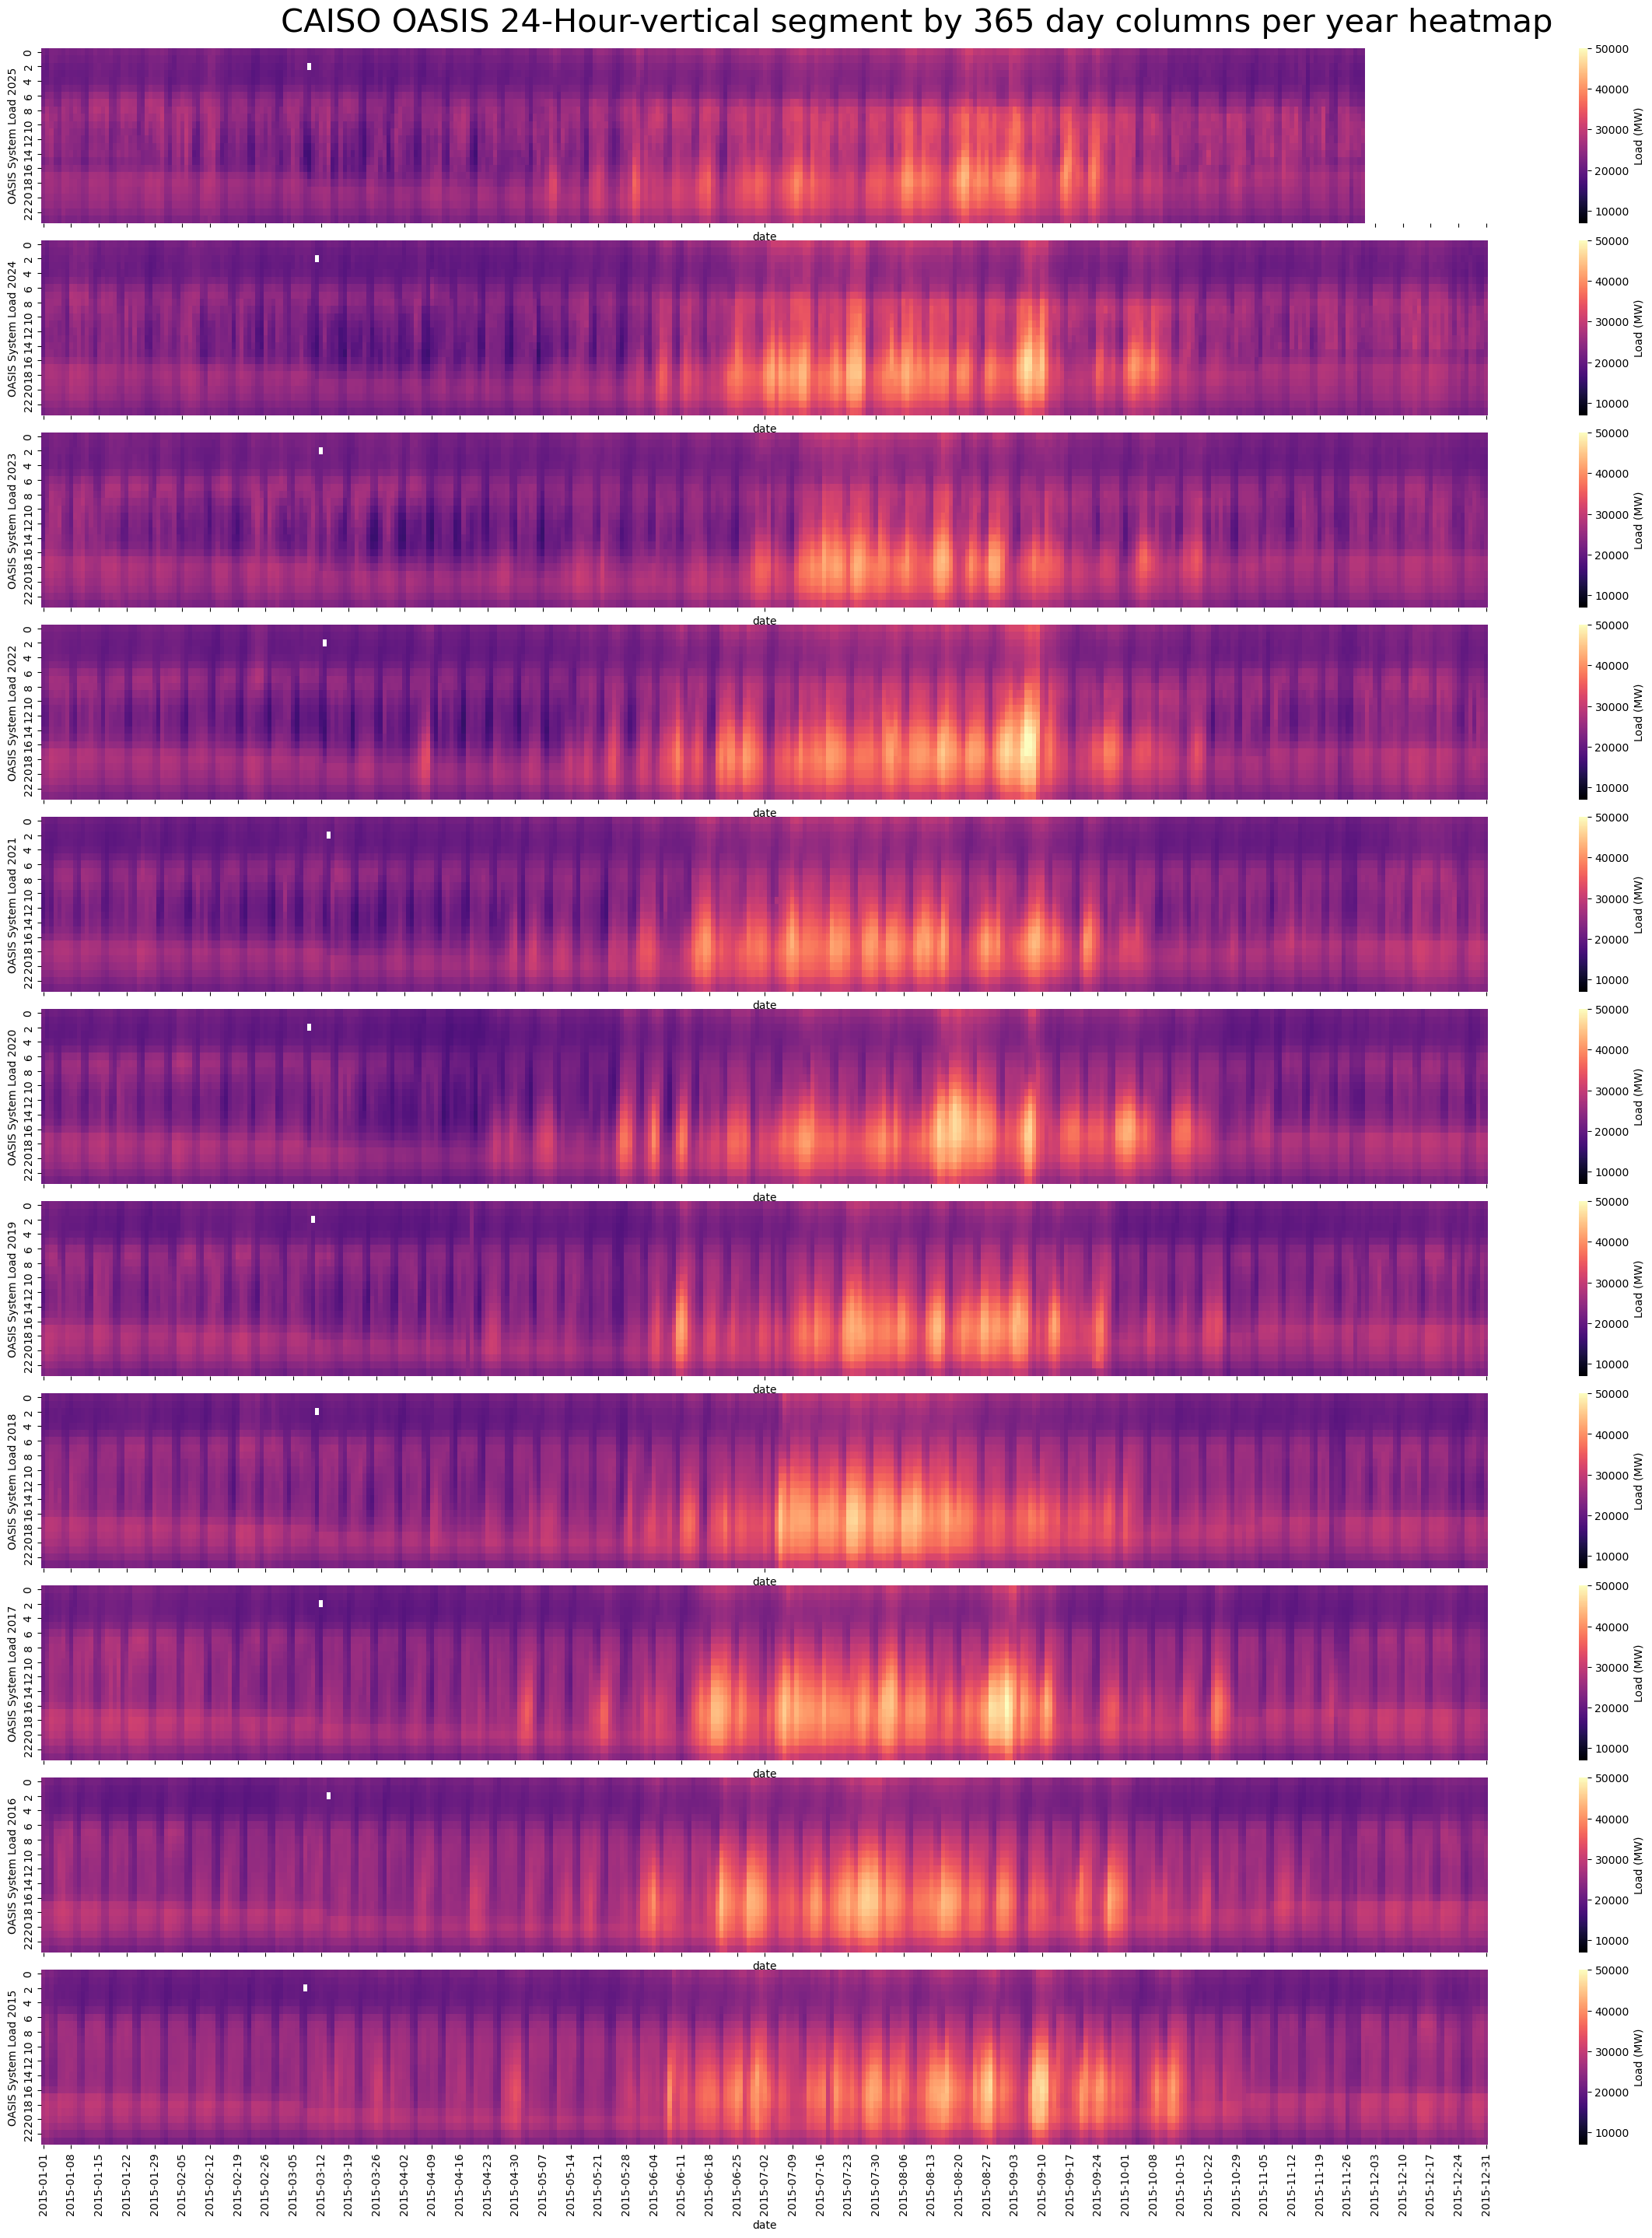

In [25]:
#date_form = mdates.DateFormatter("%b-%d")

fig, axs3 = plt.subplots(11, figsize=(30,35),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1})

fig.suptitle('CAISO OASIS 24-Hour-vertical segment by 365 day columns per year heatmap', y=0.895, ha='center', fontsize=30)

sns.heatmap(ax=axs3[0], data=plot_heatmap_year3(2025), cmap = 'magma', xticklabels=7,
                     vmin=7000, vmax=50000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[1], data=plot_heatmap_year3(2024), cmap = 'magma', xticklabels=7,
                     vmin=7000, vmax=50000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[2], data=plot_heatmap_year3(2023), cmap = 'magma', xticklabels=7,
                     vmin=7000, vmax=50000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[3], data=plot_heatmap_year3(2022), cmap = 'magma', xticklabels=7,
                     vmin=7000, vmax=50000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})
                     #annot_kws={"size": 2}, square=True, cbar_kws={"shrink": .48, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[4], data=plot_heatmap_year3(2021), cmap = 'magma', xticklabels=7,
                     vmin=7000, vmax=50000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[5], data=plot_heatmap_year3(2020), cmap = 'magma', xticklabels=7,
                     vmin=7000, vmax=50000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[6], data=plot_heatmap_year3(2019), cmap = 'magma', xticklabels=7,
                     vmin=7000, vmax=50000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[7], data=plot_heatmap_year3(2018), cmap = 'magma', xticklabels=7,
                     vmin=7000, vmax=50000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[8], data=plot_heatmap_year3(2017), cmap = 'magma', xticklabels=7,
                     vmin=7000, vmax=50000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[9], data=plot_heatmap_year3(2016), cmap = 'magma', xticklabels=7,
                     vmin=7000, vmax=50000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[10], data=plot_heatmap_year3(2015), cmap = 'magma', xticklabels=7,
                     vmin=7000, vmax=50000, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

#sns.heatmap(ax=axs3[11], data=plot_heatmap_year3(2014), cmap = 'magma', xticklabels=7,
#                     vmin=14000, vmax=52000, #vmin=900, vmax=1700,
#                     annot=False, linewidths=0,
#                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})



yearlist = [2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015]

for year, ax in enumerate(axs3.flat):
    ax.set(ylabel=f'OASIS System Load {yearlist[year]}')#, title='CAISO OASIS 24-Hour-vertical segment by 365 day columns per year heatmap')

plt.savefig(fname = "caiso_oasis_hourly_figure03a.png", \
                    dpi=125,
                    bbox_inches='tight')